Data source:

In order to answer the above question, data on Toronto City neighborhoods, boroughs to include boundaries, latitude, longitude, restaurants, and restaurant ratings and tips are required.

Toronto City data containing the neighborhoods and boroughs, latitudes, and longitudes will be obtained from the data source: 
    https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M

Using the beautifulsoup4 to scrab the data:

In [1]:
!pip install bs4
import requests
from bs4 import BeautifulSoup
URL = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')

     |████████████████████████████████| 122kB 6.1MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/a0/b0/b2/4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built bs4


In [2]:
table = soup.find_all('table')[0]
import pandas as pd
new_table = pd.DataFrame(columns=['Postal Code','Borough','Neighbourhood'], index = range(0,len(table.find_all('tr')))) # I know the size 
    
row_marker = -1
for row in table.find_all('tr'):
    #print(row)
    column_marker = 0
    columns = row.find_all('td')
    if(len(columns) > 0):
        row_marker = row_marker + 1
        for column in columns:
            #print(row_marker,column_marker)
            if(columns[1].get_text().replace('\n','') != 'Not assigned' and columns[2].get_text().replace('\n','') != 'Not assigned'):
                if(column_marker == 2 and columns[column_marker].get_text().replace('\n','') == 'Not assigned' and columns[1].get_text().replace('\n','') != 'Not assigned'):
                    new_table.iat[row_marker,column_marker] = columns[1].get_text().replace('\n','')
                else:
                    new_table.iat[row_marker,column_marker] = column.get_text().replace('\n','')
            column_marker += 1
new_table = new_table.dropna()
new_table.reset_index(drop=True,inplace=True)
new_table.head(50)

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [3]:
new_table.shape

(103, 3)

In [4]:
import pandas as pd 
geo_data = pd.read_csv("Geospatial_Coordinates.csv") 
geo_data.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [6]:
geo_table = pd.DataFrame(columns=['Postal Code','Borough','Neighbourhood','Latitude','Longitude'], index = range(0,len(new_table)))
geo_row_marker = 0
for index, row in new_table.iterrows():
    geo_table.iat[geo_row_marker,0] = row[0]
    geo_table.iat[geo_row_marker,1] = row[1]
    geo_table.iat[geo_row_marker,2] = row[2]
    geo_table.iat[geo_row_marker,3] = geo_data.loc[geo_data['Postal Code'] == row[0]].iat[0,1]
    geo_table.iat[geo_row_marker,4] = geo_data.loc[geo_data['Postal Code'] == row[0]].iat[0,2]
    geo_row_marker +=1

geo_table

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.7533,-79.3297
1,M4A,North York,Victoria Village,43.7259,-79.3156
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.6543,-79.3606
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.7185,-79.4648
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.6623,-79.3895
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.6537,-79.5069
99,M4Y,Downtown Toronto,Church and Wellesley,43.6659,-79.3832
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.6627,-79.3216
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.6363,-79.4985


Define client_id and client_secret for Foursquare

In [11]:
CLIENT_ID = 'SHLB43NHMIFGEQYIUVWNLE14ZOIGUD0VPFNMQM15UCMSRLQS' # your Foursquare ID
CLIENT_SECRET = 'KJD02ZNSLQ153U5WKYFBSFRGKKPTYJV2TZ1KC1ZBZEV5IDWS' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: SHLB43NHMIFGEQYIUVWNLE14ZOIGUD0VPFNMQM15UCMSRLQS
CLIENT_SECRET:KJD02ZNSLQ153U5WKYFBSFRGKKPTYJV2TZ1KC1ZBZEV5IDWS


In [13]:
LIMIT = 100
radius = 5000
venues = []

for lat, long, dist, pop, code in zip(geo_table['Latitude'], geo_table['Longitude'], geo_table['Borough'], geo_table['Postal Code'], geo_table['Neighbourhood']):
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    results = requests.get(url).json()["response"]['groups'][0]['items']
    for venue in results:
        venues.append((
            dist, 
            code,
            pop,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['id'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [14]:
venues_df = pd.DataFrame(venues)
venues_df.columns = ['District', 'Population', 'Code', 'Latitude', 'Longitude', 'VenueName','VenueId', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']
venues_df

,District,Population,Code,Latitude,Longitude,VenueName,VenueId,VenueLatitude,VenueLongitude,VenueCategory
0,North York,Parkwoods,M3A,43.753259,-79.329656,Allwyn's Bakery,4b8991cbf964a520814232e3,43.759840,-79.324719,Caribbean Restaurant
1,North York,Parkwoods,M3A,43.753259,-79.329656,Donalda Golf & Country Club,4bd4846a6798ef3bd0c5618d,43.752816,-79.342741,Golf Course
2,North York,Parkwoods,M3A,43.753259,-79.329656,Galleria Supermarket,4ccec87654f0b1f7f32824ca,43.753520,-79.349518,Supermarket
3,North York,Parkwoods,M3A,43.753259,-79.329656,Tim Hortons,57e286f2498e43d84d92d34a,43.760668,-79.326368,Café
4,North York,Parkwoods,M3A,43.753259,-79.329656,Island Foods,4b0aed06f964a520202a23e3,43.745866,-79.346035,Caribbean Restaurant
...,...,...,...,...,...,...,...,...,...,...
10253,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,...",M8Z,43.628841,-79.520999,Marie Curtis Park,4b9bd808f964a5203a2c36e3,43.589250,-79.544338,Park
10254,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,...",M8Z,43.628841,-79.520999,Astoria Shish Kebob House,4b7492bcf964a520fce42de3,43.621795,-79.570540,Greek Restaurant
10255,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,...",M8Z,43.628841,-79.520999,Jack Astor's Bar & Grill,4ae625d1f964a52016a521e3,43.614193,-79.560130,American Restaurant
10256,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,...",M8Z,43.628841,-79.520999,SEPHORA,4c97f9e44804a143a8eae70e,43.611090,-79.557504,Cosmetics Shop


In [17]:
venues_df['VenueCategory'].unique()


array(['Caribbean Restaurant', 'Golf Course', 'Supermarket', 'Café',
       'Event Space', 'Middle Eastern Restaurant',
       'Health & Beauty Service', 'Coffee Shop', 'Grocery Store',
       'Mediterranean Restaurant', 'Italian Restaurant', 'Shopping Mall',
       'Greek Restaurant', 'Mexican Restaurant', 'Gym / Fitness Center',
       'Burrito Place', 'Thai Restaurant', 'Vietnamese Restaurant',
       'History Museum', 'Park', 'Cantonese Restaurant', 'Bagel Shop',
       'Movie Theater', 'Falafel Restaurant', 'Liquor Store',
       'Botanical Garden', 'Restaurant', 'New American Restaurant',
       'Burger Joint', 'Japanese Restaurant', 'Sushi Restaurant',
       'Indian Restaurant', 'African Restaurant', 'Gym',
       'Other Great Outdoors', 'Bakery', 'Fish Market', 'Bank',
       'Pool Hall', 'Korean Restaurant', 'American Restaurant',
       'Chocolate Shop', 'General Entertainment', 'Ice Cream Shop',
       'Breakfast Spot', 'Sandwich Place', 'BBQ Joint',
       'Electronics Sto

Find the shopping mall venues

In [18]:
shopping_df = venues_df[venues_df["VenueCategory"]=='Shopping Mall']

Find No. of shopping mall per district

In [19]:
no_of_shopping_mall = shopping_df['District'].value_counts()
no_of_shopping_mall

North York          26
Central Toronto     10
Downtown Toronto     7
Etobicoke            6
York                 5
East York            3
Scarborough          1
Name: District, dtype: int64

Plot the number of malls per district

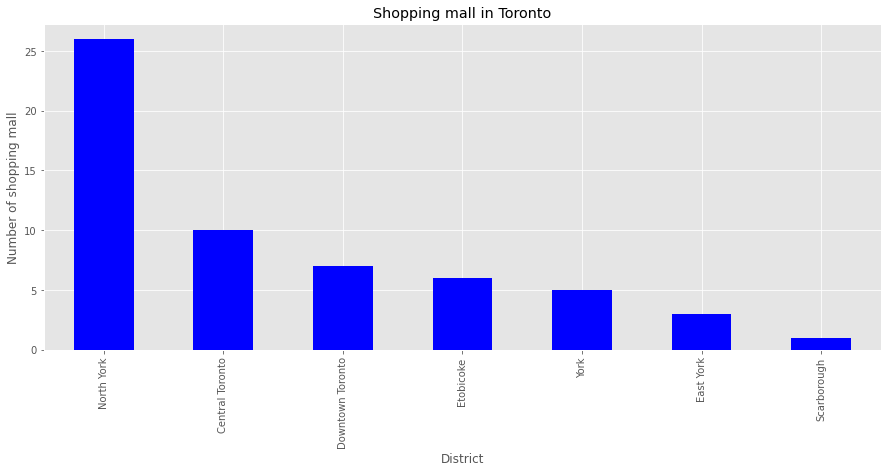

In [21]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')

no_of_shopping_mall.plot(kind='bar',  color='blue', figsize=(15, 6))

plt.xlabel('District') # add to x-label to the plot
plt.ylabel('Number of shopping mall') # add y-label to the plot
plt.title('Shopping mall in Toronto') # add title to the plot

plt.show()

In [22]:
# one hot encoding
df_onehot = pd.get_dummies(venues_df[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
df_onehot['District'] = venues_df['District'] 

# move neighborhood column to the first column
fixed_columns = [df_onehot.columns[-1]] + list(df_onehot.columns[:-1])
df_onehot = df_onehot[fixed_columns]

print(df_onehot.shape)
df_onehot.head()

(10258, 256)


,District,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,American Restaurant,Amphitheater,Art Gallery,Arts & Crafts Store,Asian Restaurant,...,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Xinjiang Restaurant,Yoga Studio,Zoo,Zoo Exhibit
0,North York,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,North York,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,North York,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,North York,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,North York,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
df_grouped = df_onehot.groupby(["District"]).mean().reset_index()

print(df_grouped.shape)
df_grouped.head()

(10, 256)


,District,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,American Restaurant,Amphitheater,Art Gallery,Arts & Crafts Store,Asian Restaurant,...,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Xinjiang Restaurant,Yoga Studio,Zoo,Zoo Exhibit
0,Central Toronto,0.001111,0.0,0.000000,0.00000,0.002222,0.000000,0.0,0.003333,0.002222,...,0.0,0.000000,0.003333,0.003333,0.001111,0.000000,0.0,0.004444,0.0,0.0
1,Downtown Toronto,0.000000,0.0,0.000000,0.00000,0.010000,0.000000,0.0,0.008947,0.000526,...,0.0,0.001579,0.000000,0.000526,0.000000,0.000000,0.0,0.004737,0.0,0.0
2,East Toronto,0.000000,0.0,0.000000,0.00000,0.010000,0.000000,0.0,0.000000,0.010000,...,0.0,0.006000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
3,East York,0.002000,0.0,0.000000,0.00000,0.016000,0.000000,0.0,0.000000,0.010000,...,0.0,0.006000,0.012000,0.000000,0.000000,0.000000,0.0,0.004000,0.0,0.0
4,Etobicoke,0.000846,0.0,0.000846,0.00423,0.010152,0.000846,0.0,0.001692,0.008460,...,0.0,0.005076,0.007614,0.000000,0.006768,0.002538,0.0,0.009306,0.0,0.0


In [24]:
len(df_grouped[df_grouped["Shopping Mall"] > 0])

7

In [ ]:
df_mall = df_grouped[["District","Shopping Mall"]]

Cluster districts in Bangkok using K-Mean

In [27]:
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 3

df_clustering = df_mall.drop(["District"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 2, 0, 2, 2, 0, 1, 0, 0, 1], dtype=int32)

In [48]:
df_clustered = df_mall.copy()

# add clustering labels
df_clustered["Cluster"] = kmeans.labels_
df_clustered.head(100)

,District,Shopping Mall,Cluster
0,Central Toronto,0.011111,1
1,Downtown Toronto,0.003684,2
2,East Toronto,0.000000,0
3,East York,0.006000,2
4,Etobicoke,0.005076,2
5,Mississauga,0.000000,0
6,North York,0.010888,1
7,Scarborough,0.000592,0
8,West Toronto,0.000000,0
9,York,0.010000,1


In [49]:
districts = []
districts.append(('East York', 43.691200,-79.341667))
districts.append(('Etobicoke', 43.620495,-79.513199))
districts.append(('East Toronto', 43.691200,-79.341667))
districts.append(('Central Toronto', 43.761539,-79.411079))
districts.append(('Downtown Toronto', 43.6547527,-79.4141868))

districts.append(('Mississauga', 43.595310,-79.640579))
districts.append(('North York', 43.761539,-79.411079))
districts.append(('Scarborough', 43.777702,-79.233238))
districts.append(('West Toronto', 43.651070,-79.347015))
districts.append(('York', 43.695683,-79.450279))

districts_df = pd.DataFrame(districts)
districts_df.columns = ['District', 'Latitude', 'Longitude']
districts_df

,District,Latitude,Longitude
0,East York,43.691200,-79.341667
1,Etobicoke,43.620495,-79.513199
2,East Toronto,43.691200,-79.341667
3,Central Toronto,43.761539,-79.411079
4,Downtown Toronto,43.654753,-79.414187
5,Mississauga,43.595310,-79.640579
6,North York,43.761539,-79.411079
7,Scarborough,43.777702,-79.233238
8,West Toronto,43.651070,-79.347015
9,York,43.695683,-79.450279


In [50]:
# add latitude/longitude for each district
df_clustered = df_clustered.join(districts_df.set_index("District"), on="District")

print(df_clustered.shape)
df_clustered.head(100)

(10, 5)


,District,Shopping Mall,Cluster,Latitude,Longitude
0,Central Toronto,0.011111,1,43.761539,-79.411079
1,Downtown Toronto,0.003684,2,43.654753,-79.414187
2,East Toronto,0.000000,0,43.691200,-79.341667
3,East York,0.006000,2,43.691200,-79.341667
4,Etobicoke,0.005076,2,43.620495,-79.513199
5,Mississauga,0.000000,0,43.595310,-79.640579
6,North York,0.010888,1,43.761539,-79.411079
7,Scarborough,0.000592,0,43.777702,-79.233238
8,West Toronto,0.000000,0,43.651070,-79.347015
9,York,0.010000,1,43.695683,-79.450279


Explore districts on map

In [58]:
!pip install geopy

from geopy.geocoders import Nominatim
import folium
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors

In [59]:
geolocator = Nominatim(user_agent="capstone")


toronto = geolocator.geocode(' ,Toronto')

map_clusters = folium.Map(location=[toronto.latitude, toronto.longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_clustered['Latitude'], df_clustered['Longitude'], df_clustered['District'], df_clustered['Cluster']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color='black',
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters


In [60]:
df_clustered.loc[df_clustered['Cluster'] == 0].head()

,District,Shopping Mall,Cluster,Latitude,Longitude
2,East Toronto,0.000000,0,43.691200,-79.341667
5,Mississauga,0.000000,0,43.595310,-79.640579
7,Scarborough,0.000592,0,43.777702,-79.233238
8,West Toronto,0.000000,0,43.651070,-79.347015


In [61]:
df_clustered.loc[df_clustered['Cluster'] == 1].head()

,District,Shopping Mall,Cluster,Latitude,Longitude
0,Central Toronto,0.011111,1,43.761539,-79.411079
6,North York,0.010888,1,43.761539,-79.411079
9,York,0.010000,1,43.695683,-79.450279


In [62]:
df_clustered.loc[df_clustered['Cluster'] == 2].head()

,District,Shopping Mall,Cluster,Latitude,Longitude
1,Downtown Toronto,0.003684,2,43.654753,-79.414187
3,East York,0.006000,2,43.691200,-79.341667
4,Etobicoke,0.005076,2,43.620495,-79.513199


In [63]:
df_clustered

,District,Shopping Mall,Cluster,Latitude,Longitude
0,Central Toronto,0.011111,1,43.761539,-79.411079
1,Downtown Toronto,0.003684,2,43.654753,-79.414187
2,East Toronto,0.000000,0,43.691200,-79.341667
3,East York,0.006000,2,43.691200,-79.341667
4,Etobicoke,0.005076,2,43.620495,-79.513199
5,Mississauga,0.000000,0,43.595310,-79.640579
6,North York,0.010888,1,43.761539,-79.411079
7,Scarborough,0.000592,0,43.777702,-79.233238
8,West Toronto,0.000000,0,43.651070,-79.347015
9,York,0.010000,1,43.695683,-79.450279


Conclusion

The objective of this project is to support decision making of building a new shopping mall in Toronto. Using the following process:
<ul>
  <li> Identifying the business problem.</li>
  <li> Specifying the required data.</li>
  <li> Extract and prepare the data.</li>
  <li> Performing machine learning by clustering the data into 3 clusters based on their similarities</li>
  <li> Finally providing recommendations.</li>
<ul>   
